In [0]:
import cv2
import glob
import numpy as np
from keras import callbacks
import keras.backend as K
from sklearn.metrics import roc_auc_score
import os as os
import pandas as pd
import ast
import random
import keras
import math
from keras.layers.normalization import BatchNormalization
from sklearn import metrics
%matplotlib inline
from keras.optimizers import SGD,Adam
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
from keras.applications.resnet50 import preprocess_input
from keras.models import Sequential,Model
from keras.models import model_from_json
from keras.layers import Dense,ZeroPadding2D,Convolution2D,MaxPooling2D,Dropout,Flatten,Activation,Input,concatenate

Using TensorFlow backend.


In [0]:
from google.colab import drive
drive.mount('/gdrive',force_remount = True)
%cd ..

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /gdrive
/


In [0]:
xdata  = []

In [0]:
# loading weights into new model
json_file = open('/gdrive/My Drive/gendata/gennet.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)

loaded_model.load_weights("/gdrive/My Drive/gendata/genweights.h5")
print("Loaded model from disk")

# loaded_model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])
# score = loaded_model.evaluate(x, y, verbose=1)
# print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

W0625 06:45:41.975236 139676126603136 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0625 06:45:42.148422 139676126603136 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0625 06:45:42.203388 139676126603136 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0625 06:45:42.507957 139676126603136 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:131: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0625 06:45:42.510004 139676126603136 deprecation_wrap

Loaded model from disk


In [0]:
json_file = open('/gdrive/My Drive/gendata/gennet.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
loaded_model.load_weights("/gdrive/My Drive/gendata/genweights.h5")
img1 = cv2.imread(train_all[14][2])
img2 = cv2.imread(train_all[39][2])
def agelabeller(img1,img2,loaded_model):
    
    i1 = (cv2.resize(img1,(178,218),interpolation=cv2.INTER_CUBIC))
    i2 = (cv2.resize(img2,(178,218),interpolation=cv2.INTER_CUBIC))
    arr = []
    arr.append(i1)
    arr.append(i2)
    l1 = loaded_model.predict(np.array(arr))
    if l1[0]<0.5:
      l1[0]= 0
    else:
      l1[0] =1
    if l1[1]<0.5:
      l1[1]= 0
    else:
      l1[1]=1
    if(l1[0]!=l1[1]):
       return(0)
    elif(l1[0]==l1[1]==0):
       return(-1)
    elif(l1[0]==l1[1]==1):
       return(1)
agelabeller(im1,im2,loaded_model)

[1.6510282e-07] [0.00023709]


-1

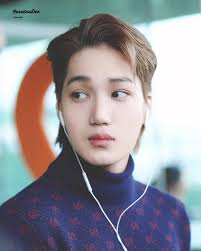

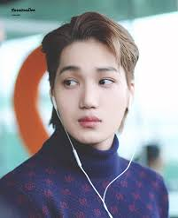

In [0]:
im = cv2.imread('gdrive/My Drive/k.jpg')
cv2_imshow(im)
img = (cv2.resize(im,(178,218),interpolation=cv2.INTER_CUBIC))
cv2_imshow(img)

In [0]:
arr = []
arr.append(img)
l1 = loaded_model.predict(np.array(arr))

In [0]:
l1[0]

array([0.9992188], dtype=float32)

In [0]:
json_file = open('/gdrive/My Drive/gendata/gennet.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
loaded_model.load_weights("/gdrive/My Drive/gendata/genweights.h5")
